# Применение градиентных методов для вычисления коэффициентов линейной регрессии

**Рассмотрим алгоритмы градиентного спуска на задаче восстановления линейной регрессии**

In [26]:
import numpy as np

# Сгенерируем набор данных, который можно апроксимировать с помощью линейной регрессии
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

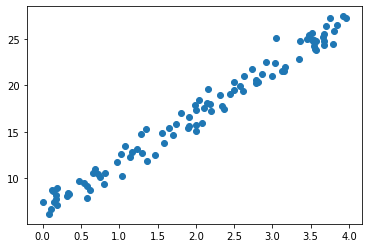

In [19]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

# Пакетный градиентный спуск (Batch Gradient Descent)

Общий признак градиентных методов оптимизации - итеративное уменьшение значения функции ошибки при помощи движения в сторону её антиградиента.
![title](img/gd.png)


Рассмотрим задачу линейной регрессии, приближающей некоторую зависимость:  
<p style="text-align: center;">$\hat{y_i} = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... + \beta_n x_{n,i}$ (1)</p>
Простейший вариант:  

<p style="text-align: center;">$\hat{y_i} = \beta_0 + \beta_1 x_{i}$</p>   


**Задача: подобрать коэффициенты $\beta$ таким образом, чтобы наиболее точно апроксимировать (приблизить) моделируемую зависимость.**
Для реализации градиентного спуска необходимо итеративно вычислять градиент функции ошибки относительно параметров $\beta$. Другими словами, мы вычисляем как сильно изменится функция ошибки, если мы немного изменим каждый из коэффициентов $\beta$. Это называется частными производными. Данное действие похоже на то, если бы мы спросили себя: насколько низко я спущусь с горы, если немного пройду на восток? А если на юг? А теперь представим, что у нас множество таких измерений [3]. 

Чтобы вычислить коэффициенты модели, на первом этапе необходимо ввести функцию ошибки, которую необходимо минимизировать.  
Обозначим $e_i$ как ошибку модели на точке с номером $i$, таким образом:    
<p style="text-align: center;">$e_i = y_i - \hat{y_i}$</p> 

Где $\hat{y_i}$ - моделируемый результат, $y_i$ - известный результат.    
Объявим функцию ошибки:    

<p style="text-align: center;">$Loss(\beta)= \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (y_i - \hat{y_i})^2 = \sum_{i=1}^m (y_i - X\beta)^2 $</p>

Градиент функции ошибки (вектор частных производных):  

<p style="text-align: center;">$\frac{\partial}{\partial\beta_{j}}Loss(\beta)=\frac{2}{m}\sum_{i=1}^m(y^{(i)}-x^{(i)}\beta)(-x_{j}^{(i)})$</p>

Перепишем в матричной форме:
<p style="text-align: center;">$\frac{\partial}{\partial\beta}Loss(\beta)=\frac{2}{m}(-X)^{T}(Y-X\beta)$</p>

После того как в рамках каждой итерации мы вычислили градиент, который показывает направление роста функции, нам необходимо двигаться в направлении антиградиента, для того чтобы стремиться к минимуму функции ошибок:

<p style="text-align: center;">$\beta^{next}=\beta-\eta\nabla_{\beta}Loss(\beta)$</p>

Где $\eta$ - показатель обучения (learning rate)

### Программная реализация пакетного градиентного спуска

In [89]:
# Реализация в коде
from sklearn.base import BaseEstimator
import numpy as np

class BatchGradientRegressor(BaseEstimator):
    ''' Пакетный градиентный спуск
    '''
    def __init__(self, learning_rate = 0.01, epochs = 10, verbose = False): 
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.verbose = verbose
    
    def __calc_loss(self, X, y, beta):
        lp = y - X.dot(beta)
        return lp.T.dot(lp)
        
    def fit(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
       
        beta = np.ones((n, 1)) # Инициализируем веса
        
        for ep in range(0, self.epochs):
            gradient = (2 / m) * (np.negative(X).T.dot(y - X.dot(beta))) # Вычислем градиент по формуле, описанной выше
            beta = beta - self.learning_rate * gradient # Движемся в направлении антиградиента
            
            loss = self.__calc_loss(X, y, beta) # Оцениваем качество
            
            if (self.verbose):
                print("Loss:", loss)
        
        self.coeffs_ = beta

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coeffs_)

При разработке моделей машинного обучения принято соблюдать соглашение, описывающее структуру класса и его методы.  
Подробнее можно почитать в [[1]](https://arxiv.org/pdf/1309.0238v1.pdf) и [[2]](https://scikit-learn.org/dev/developers/develop.html)

### Генерация данных для обучения

In [17]:
# Сгенерируем точки с шумом
X = 4 * np.random.rand(100, 1)
y = 7 + 5 * X + np.random.randn(100, 1)

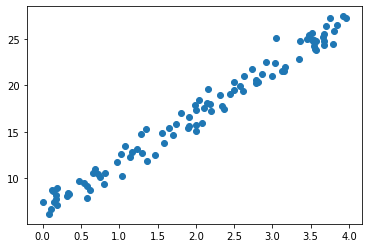

In [20]:
plt.scatter(X, y)
plt.show()

Помимо градиентных методов, коэффициенты линейной регрессии можно вычислить аналитически по формуле:
<p style="text-align: center;">$\hat{\beta} = (X^{T}X)^{-1} X^{T}Y$</p>  
Выполним это вычисление, будем считать его эталонным и сравнивать с ним градиентные методы.

In [21]:
# Найдём коэффициенты линейной регрессии, с помощью аналитического решения, приведённого выше
# Функция np.c_ соединяет два массива как две колонки
# Добавляем x0 = 1 для каждого примера. (Данная колонка будет отвечать за коэффициент 𝛽0)
X_b = np.c_[np.ones((100, 1)), X]
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [22]:
beta_best # Найденные коэффициенты линейной регрессии с помощью аналитического решения

array([[6.64758719],
       [5.10792872]])

### Обучение модели пакетного градиентного спуска

In [92]:
batch_regressor = BatchGradientRegressor(learning_rate=0.1, epochs=100)
batch_regressor.fit(X_b, y) # Обучаем модель - вычисляем коэффициенты линейной регрессии при помощи пакетного градиентного спуска

In [93]:
batch_regressor.coeffs_ # Найденные коэффициенты линейной регрессии с помощью пакетного градиентного спуска

array([[6.61493002],
       [5.12027281]])

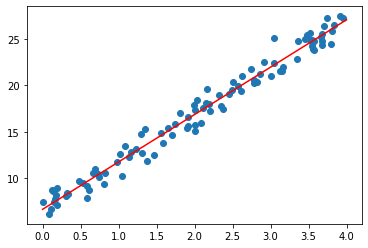

In [86]:
# Построим график восстановленной линейной регрессии
plt.scatter(X, y)
x = np.linspace(0.,4.)
plt.plot(x, batch_regressor.coeffs_[0] + x * batch_regressor.coeffs_[1], color='r')
plt.show()

In [95]:
# Вычислим предсказания
X_test = np.array([2, 3, 4]).T
y_pred = batch_regressor.predict(X_test)

y_pred

array([[16.85547565],
       [21.97574847],
       [27.09602128]])

# Стохастический градиентный спуск (Stohastic Gradient Descent)

Главная проблема пакетного градиентного спуска (Batch Gradient Descent) заключается в том, что он использует всю выборку для вычисления градиентов на каждом шагу, что делает его очень медленным при большом датасете. Стохастический градиентный спуск же выбирает случайный экземпляр данных и вычисляет градиент только на его основании. Очевидно, это делает алгоритм намного быстрее, так как он оперирует малым количеством данных  на каждой итерации. 
С другой стороны, из-за своей стохастической (случайной) природы, этот алгоритм гораздо менее устойчив.
Значение функции ошибок будет скакать вверх и вниз, уменьшаясь в среднем.
![title](img/sgd.png)

### Псевдокод алгоритма стохастического градиентного спуска (вариация)
        
    
•Выбрать начальный вектор параметров $\beta$ и коэффициент обучения  $\eta$  
•Повторять до тех пор пока не будет получен минимум функции ошибки:  
&emsp;&emsp;•Случайным образом перемешать элементы обучающей выборки  
&emsp;&emsp;&emsp;&emsp;•Для $i = 1,2,....,m$, выполнить:   
    
<p style="text-align: center;">$\beta^{next}=\beta-\eta\nabla_{\beta}Loss_{i}(\beta)$</p>

### Программная реализация стохастического градиентного спуска
Обратите внимание, данная реализация несколько отличается от приведенного выше псевдокода (Чем именно? Попробуйте изменить алгоритм и оценить его качество.)

In [141]:
class StohasticGradientRegressor(BaseEstimator):
    ''' Стохастический градиентный спуск
    '''
    def __init__(self, epochs = 10, verbose = False): 
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.verbose = verbose
    
    def __calc_loss(self, X, y, beta):
        lp = y - X.dot(beta)
        return lp.T.dot(lp)
        
    __t0, __t1 = 5, 50 # learning schedule hyperparameters
    
    def __learning_schedule(self, t):
        return self.__t0 / (t + self.__t1)
        
    def fit(self, X, y):
        n_epochs = self.epochs
        m = X.shape[0]
        n = X.shape[1]
       
        beta = np.ones((n, 1)) # Инициализируем веса
        
        for epoch in range(n_epochs): # В данном случае эпохой называем проход по m элементам
            for i in range(m): 
                random_index = np.random.randint(m)
                xi = X[random_index:random_index+1] # Выбираем случайную строку из двумерного массива
                yi = y[random_index:random_index+1]
                
                #gradients = 2 * xi.T.dot(xi.dot(beta) - yi) # Вариант из книги [3]
                gradients = 2 * (np.negative(xi).T.dot(yi - xi.dot(beta))) 
                
                eta = self.__learning_schedule(epoch * m + i) # уменьшаем learning_rate по мере приближения к минимуму ошибки
                beta = beta - eta * gradients
                
            loss = self.__calc_loss(X, y, beta)   # Оцениваем качество
            # Для ускорения работы алгоритма, функционал ошибки можно не вычислять каждый раз,
            # а лишь оценивать с помощью рекуррентных формул, подробнее в [5]
            
            if (self.verbose):
                    print("Loss:", loss)
        
        self.coeffs_ = beta

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coeffs_)

### Обучение модели стохастического градиентного спуска

Loss: [[109.0966908]]
Loss: [[135.62029096]]
Loss: [[95.61330892]]
Loss: [[88.2957857]]
Loss: [[87.88005481]]
[[6.62069755]
 [5.06931457]]


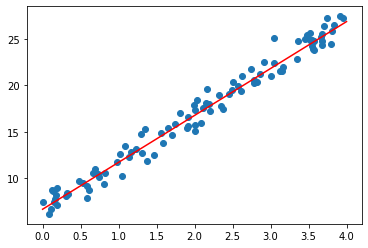

In [142]:
sgd_regressor = StohasticGradientRegressor(verbose=True, epochs=5)
sgd_regressor.fit(X_b, y)

print(sgd_regressor.coeffs_)
# Построим график восстановленной линейной регрессии с помощью стохастического градиентного спуска
plt.scatter(X, y)
x = np.linspace(0.,4.)
plt.plot(x, sgd_regressor.coeffs_[0] + x * sgd_regressor.coeffs_[1], color='r')
plt.show()

### Обучение модели стохастического градиентного спуска (с помощью библиотеки sklearn)

In [149]:
# Обучение регрессии, с помощью библиотеки sklearn
from sklearn.linear_model import SGDRegressor

X_new = np.array([[2], [3], [4]])

sgd_reg = SGDRegressor()
sgd_reg.fit(X, y.ravel())
print("Коэффициенты:", sgd_reg.intercept_, sgd_reg.coef_)

y_pred = sgd_reg.predict(X_new)
print("Предсказания:", y_pred)

Коэффициенты: [6.34941567] [5.22852402]
Предсказания: [16.80646371 22.03498774 27.26351176]


### Ссылки
1. https://arxiv.org/pdf/1309.0238v1.pdf
2. https://scikit-learn.org/dev/developers/develop.html
3. Aurélien Géron. Hands-On Machine Learning with Scikit-Learn and TensorFlow, C. 150
4. https://en.wikipedia.org/wiki/Stochastic_gradient_descent
5. http://neerc.ifmo.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA 